Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<ul>
<li>
<a href="#first_bullet">1. Подготовка данных</a><ul>
<li><a href="#second_bullet">1.1. Импорт библиотек</a></li>
<li><a href="#third_bullet">1.2. Чтение файла и изучение данных</a></li>
<li>
<a href="#fourth_bullet">1.3. Предобработка данных</a><ul>
<li><a href="#fifth_bullet">Обработка дубликатов</a></li>
<li><a href="#sixth_bullet">Отсев лишних признаков</a></li>
<li><a href="#seventh_bullet">Обработка пропусков</a></li>
<li><a href="#eighth_bullet">Замена типа данных для категориальных переменных</a></li>
<li><a href="#ninth_bullet">Обработка численных признаков</a></li>
</ul>
</li>
</ul>
</li>
<li>
<a href="#tenth_bullet">2. Обучение моделей</a><ul>
<li>
<a href="#eleventh_bullet">2.1. Подготовка данных</a><ul>
<li><a href="#twelfth_bullet">2.1.1. Преобразование признаков</a></li>
<li><a href="#thirteenth_bullet">2.1.2. Разбиение данных на выборки</a></li>
<li><a href="#fourteenth_bullet">2.1.3. Масштабирование признаков</a></li>
</ul>
</li>
<li>
<a href="#sixteenth_bullet">2.2. Обучение разных моделей</a><ul>
<li><a href="#seventeenth_bullet">2.2.1. LinearRegression</a></li>
<li><a href="#eighteenth_bullet">2.2.2. LGBMRegressor</a></li>
<li><a href="#nineteenth_bullet">2.2.3. CatBoostRegressor</a></li>
</ul>
</li>
</ul>
</li>
<li><a href="#twentieth_bullet">3. Анализ моделей и вывод</a></li>
</ul>

# 1. Подготовка данных

### 1.1. Импорт библиотек

In [1]:
! pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
! pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from catboost import CatBoostRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import time

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML, Image
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)

In [4]:
!pip3 install seaborn==0.11.0 
import seaborn as sns
sns.set_style('darkgrid')

Defaulting to user installation because normal site-packages is not writeable


### 1.2. Чтение файла и изучение данных

Прочитаем файл и сохраним данные в переменной data.

In [5]:
#data = pd.read_csv('C:/Users/Axmet/Downloads/datasets/autos.csv')
data = pd.read_csv('/datasets/autos.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Выведем на экран общую информацию о датафрейме.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


Датафрейм содержит следующие данные:

<b>Признаки:</b>
<ul>
<li>дата скачивания анкеты из базы</li>
<li>тип автомобильного кузова</li>
<li>год регистрации автомобиля</li>
<li>тип коробки передач</li>
<li>мощность (л. с.)</li>
<li>модель автомобиля</li>
<li>пробег (км)</li>
<li>месяц регистрации автомобиля</li>
<li>тип топлива</li>
<li>марка автомобиля</li>
<li>была машина в ремонте или нет</li>
<li>дата создания анкеты</li>
<li>количество фотографий автомобиля</li>
<li>почтовый индекс владельца анкеты (пользователя)</li>
<li>дата последней активности пользователя</li>
</ul>

<b>Целевой признак:</b>
<ul>
<li>цена (евро)</li>
</ul>

Можно отметить, что:
<ul>
<li>датафрейм содержит как количественные, так и качественные признаки</li>
<li>в данных есть пропуски</li>
<li>можно удалить такие признаки как DateCrawled, RegistrationMonth (сохраним признак с годом регистрации, а этот удалим, так как мало вероятно, что месяц регистрации будет сильно влиять на цену автомобиля), DateCreated, NumberOfPictures (этот признак содержит только 0), PostalCode и LastSeen. Они не играют важную роль при определении цены автомобиля.</li>
</ul>    

### 1.3. Предобработка данных

Обработка дубликатов

In [7]:
print('К-во дубликатов:', data.duplicated().sum())

К-во дубликатов: 4


In [8]:
data[data.duplicated() == True]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


Удалим дубликаты.

In [9]:
data.drop_duplicates(inplace=True)
print('К-во дубликатов:', data.duplicated().sum())

К-во дубликатов: 0


Отсев лишних признаков

In [10]:
df = data.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


Обработка пропусков

Посмотрим, сколько пропусков содержит каждый из признаков.

In [11]:
d = {'К-во пропусков': df.isnull().sum(), 'Доля пропусков, %': df.isnull().sum() / len(df) * 100} 
pd.DataFrame(d)

,К-во пропусков,"Доля пропусков, %"
Price,0,0.000000
VehicleType,37490,10.579487
RegistrationYear,0,0.000000
Gearbox,19833,5.596772
Power,0,0.000000
Model,19705,5.560651
Kilometer,0,0.000000
FuelType,32895,9.282802
Brand,0,0.000000
NotRepaired,71154,20.079297



Видим, что доля пропусков в признаках с пропусками составляет от 5-20%, что достаточно много. Взглянем на признаки с пропусками более подробно.

In [12]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col)
        print(df[col].value_counts())
        print('\n')

VehicleType
sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other          3288 
Name: VehicleType, dtype: int64


Gearbox
manual    268249
auto      66283 
Name: Gearbox, dtype: int64


Model
golf                  29232
other                 24420
3er                   19761
polo                  13066
corsa                 12570
                      ...  
serie_2               8    
serie_3               4    
rangerover            4    
serie_1               2    
range_rover_evoque    2    
Name: Model, Length: 250, dtype: int64


FuelType
petrol      216349
gasoline    98719 
lpg         5310  
cng         565   
hybrid      233   
other       204   
electric    90    
Name: FuelType, dtype: int64


NotRepaired
no     247158
yes    36053 
Name: NotRepaired, dtype: int64




В данной ситуации, когда имеем большое к-во пропусков и категорий, можно ввести новую категорию, например unknown и заполнить пропуски ею.

In [13]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna('unknown', inplace=True)
        
        print(col)
        print(df[col].value_counts(normalize=True)*100)
        print('\n')

VehicleType
sedan          25.808700
small          22.527620
wagon          18.389231
unknown        10.579487
bus            8.120159 
convertible    5.701184 
coupe          4.560552 
suv            3.385210 
other          0.927857 
Name: VehicleType, dtype: float64


Gearbox
manual     75.698503
auto       18.704725
unknown    5.596772 
Name: Gearbox, dtype: float64


Model
golf                  8.249122
other                 6.891200
3er                   5.576454
unknown               5.560651
polo                  3.687159
                        ...   
serie_2               0.002258
rangerover            0.001129
serie_3               0.001129
range_rover_evoque    0.000564
serie_1               0.000564
Name: Model, Length: 251, dtype: float64


FuelType
petrol      61.052587
gasoline    27.858000
unknown     9.282802 
lpg         1.498455 
cng         0.159440 
hybrid      0.065751 
other       0.057568 
electric    0.025398 
Name: FuelType, dtype: float64


NotRepaired
no  

Замена типа данных для категориальных переменных

In [14]:
cols_cat = df.select_dtypes(include='object').columns
for col in cols_cat:
    df[col] = df[col].astype('category')

Проверка результата.

In [15]:
df.dtypes

Price               int64   
VehicleType         category
RegistrationYear    int64   
Gearbox             category
Power               int64   
Model               category
Kilometer           int64   
FuelType            category
Brand               category
NotRepaired         category
dtype: object

<b>Обработка численных признаков</b>

Исследуем более подробно каждый из численных признаков и удалим аномалии, если обнаружим их.

In [16]:
df.describe(percentiles=np.arange(0,1,0.05))

,Price,RegistrationYear,Power,Kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
0%,0.000000,1000.000000,0.000000,5000.000000
5%,200.000000,1992.000000,0.000000,40000.000000
10%,499.000000,1995.000000,0.000000,70000.000000
15%,650.000000,1997.000000,54.000000,80000.000000
20%,880.000000,1998.000000,60.000000,100000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000


Для признаков Price, Power и Kilometer построим графики распределение.

In [17]:
def viz_distribution(col, col_name):
    
    '''
    Функция как аргумент принимает признак и его название. 
    Функция возвращает информацию о распределении признака.  
    '''
    
    sns.displot(x = col, legend=True, kde=True, height=5.7, aspect=1.5, bins=100)
    plt.title('Распределение значений признака ' + str(col_name).title(), fontsize=16)

    plt.figure(figsize=(9.7, 6))
    sns.boxplot(y=col)

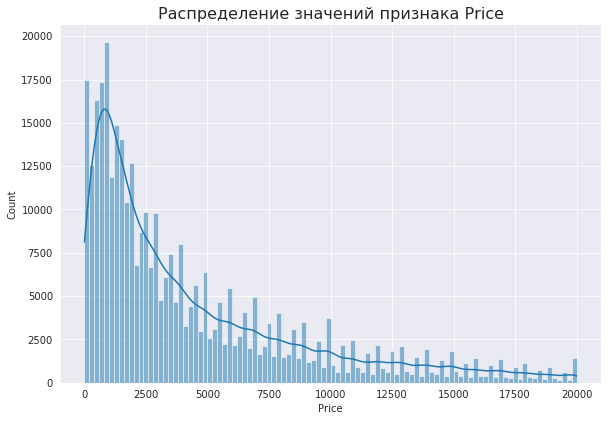

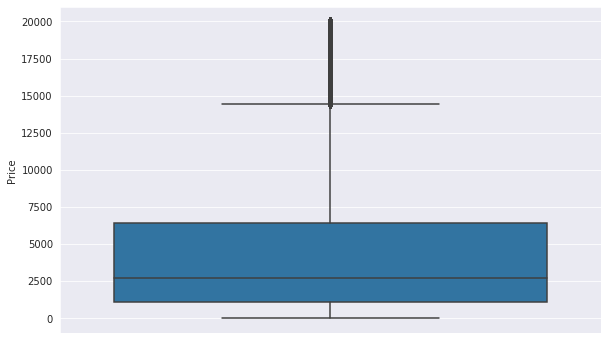

In [18]:
viz_distribution(df['Price'], 'Price')


Аномальными можно считать объекты с ценой меньше 200 денежных единиц и выше ~15к денежных единиц. Как видим, таких данных почти 10%, что достаточно много.

In [19]:
print('Доля аномалий:', len(df.query('Price < 200 or Price >14600')) / len(df) *100)

Доля аномалий: 9.9089921408717


Удалим аномальные объекты из датафрейма и сохраним результат в переменной clean_data.

In [20]:
clean_data = df.query('Price >= 200 or Price <=15000')

Исследуем признак Power.

(-10, 1000)

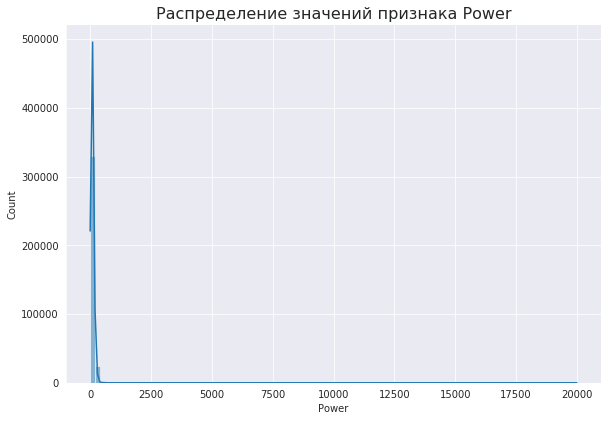

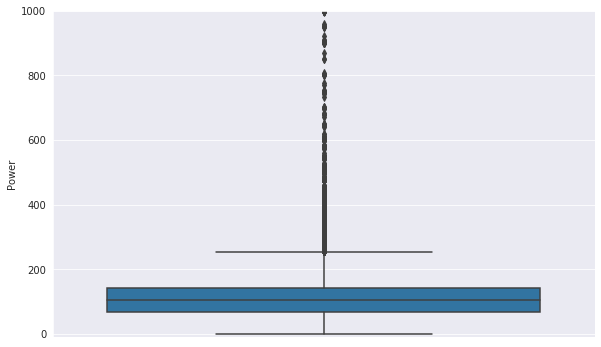

In [21]:
viz_distribution(df['Power'], 'Power')
plt.ylim(-10, 1000)


Видим, что аномальными можно считать объекты с мощностью больше 218 л.с. Также важно отметить, что этот признак содержит большое количество объектов со значением 0. Скорее всего, владелец автомобиля, при заполнинии анкеты, посто не указал мощность своего автомобиля, поэтому эти 0 можно воспринимать как пропуски и заменить на медиану, в зависимости от таких признаков как Brand, Model и FuelType.

In [22]:
clean_data['Power'] = clean_data['Power'].replace(0, np.nan)
median = clean_data.groupby(['Brand', 'Model', 'FuelType'])['Power'].transform('median')
clean_data['Power'] = clean_data['Power'].fillna(median)

Проверим к-во объектов без информации о мощности автомобиля.

In [23]:
print('К-во пропусков:', clean_data['Power'].isnull().sum())

К-во пропусков: 39944


In [24]:
clean_data.dropna(inplace=True)
clean_data.isnull().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

Исследуем более подробно признак Kilometer.

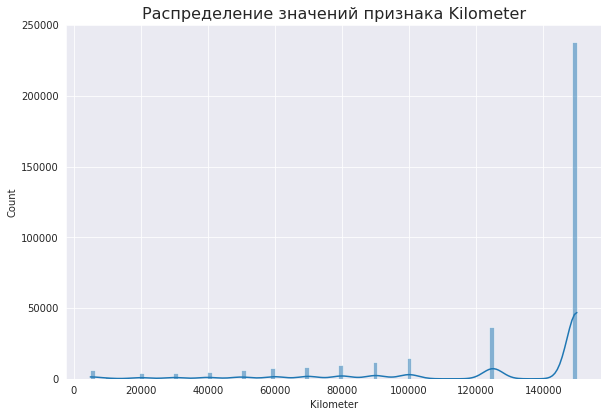

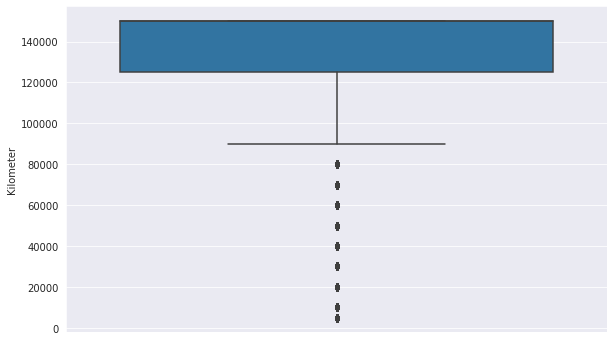

In [25]:
viz_distribution(df['Kilometer'], 'Kilometer')

Учитывая, что на продажу выставлены самые разные автомобили (новые, старые, дорогие, дешевые) и пробег у них может быть абсолютно разным, этот признак трогать не будем.

Тут интересно отметить, что медиана признака Kilometer - это одновременно и максимальный зафиксированный пробег. Возможно это как-то связано с ограничением анкеты, например, в анкете нельзя ввести более высокий показатель. Еще стоит отметить, что данный признак распределен дискретно и, по сути, можем его отнести к категориальными признаками.

С признаком RegistrationYear будем поступать следующим образом: так как нам неизвестно, о какой стране предоставлены данные и мы не можем узнать год, когда был зарегистрирован первый автомобиль в этой стране, будем считать, что год регистрации автомобиля не может быть меньше 1768 (если верить Википедии, то история первого автомобиля началась в 1768 году вместе с созданием паросиловых машин, способных перевозить человека) и больше 2020.

In [26]:
clean_data = clean_data.query('RegistrationYear > 1768')
len(clean_data)

314408

Вывод:

На этом этапе провели предобработку данных, а именно:

удалили дубликаты
заполнили пропуски
обработали и проанализировали количественные признаки
отчистили датасет от аномальных значений.
Переходим к обучению модели.

# 2. Обучение моделей

На этом этапе проекта обучим разные модели:
- LinearRegression
- LGBMRegressor
- CatBoostRegressor.

Так как будем обучать и модель линейной регрессии, категориальные признаки необходимо преобразовать в численные.

## 2.1. Подготовка данных

### 2.1.1. Преобразование признаков

Для того, чтобы преобразовать категориальные признаки в численные, вызовем функцию get_dummies() с аргументом drop_first. Такой подход позволит не попасть в дамми-ловушку, так как не создает большое количество фиктивных признаков.

In [27]:
df_ohe = pd.get_dummies(clean_data, drop_first=True)
df_ohe.head()

,Price,RegistrationYear,Power,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,VehicleType_wagon,Gearbox_manual,Gearbox_unknown,Model_145,Model_147,Model_156,Model_159,Model_1_reihe,Model_1er,Model_200,Model_2_reihe,Model_300c,Model_3_reihe,Model_3er,Model_4_reihe,Model_500,Model_5_reihe,Model_5er,Model_601,Model_6_reihe,Model_6er,Model_7er,Model_80,Model_850,Model_90,Model_900,Model_9000,Model_911,Model_a1,Model_a2,Model_a3,Model_a4,Model_a5,Model_a6,Model_a8,Model_a_klasse,Model_accord,Model_agila,Model_alhambra,...,Model_z_reihe,Model_zafira,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_chrysler,Brand_citroen,Brand_dacia,Brand_daewoo,Brand_daihatsu,Brand_fiat,Brand_ford,Brand_honda,Brand_hyundai,Brand_jaguar,Brand_jeep,Brand_kia,Brand_lada,Brand_lancia,Brand_land_rover,Brand_mazda,Brand_mercedes_benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opel,Brand_peugeot,Brand_porsche,Brand_renault,Brand_rover,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_unknown,NotRepaired_yes
1,18300,2011,190.0,125000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163.0,125000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75.0,150000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3600,2008,69.0,90000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,650,1995,102.0,150000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Признаков получилось достаточно много, что, безусловно, будет влиять на работу будущих моделей.

### 2.1.2. Разбиение данных на выборки

Так как спрятанной тестовой выборки у нас нету, разделим исходные данные на три выборки: обучающую, валидационную и тестовую. Так как размеры тестовой и валидационной выборок обычно равны, разделим данные в соотношении 3:1:1.

Для этого методом *train_test_split* разделим исходные данные на обучающую (60%) и валидационную выборку (40%), а после этого валидационную выборку разделим пополам — на валидационную и тестовую выборки.

In [28]:
target = df_ohe['Price']
features = df_ohe.drop('Price', axis=1)

In [29]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              train_size=0.60, 
                                                                              test_size=0.40, 
                                                                              random_state=123)

In [30]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            train_size=0.50, 
                                                                            test_size=0.50, 
                                                                            random_state=123)

Проверка результата.

In [31]:
samples = {'Размер обучающей выборки' : features_train, 
          'Размер валидационной выборки': features_valid, 
          'Размер тестовой выборки': features_test}

for key, value in samples.items():
    print(key + ':', value.shape)

Размер обучающей выборки: (188644, 311)
Размер валидационной выборки: (62882, 311)
Размер тестовой выборки: (62882, 311)


### 2.1.3. Масштабирование признаков

Приведем признаки к одному масштабу. Для этого будем использовать структуру для стандартизации данных StandardScaler.

In [32]:
numeric = ['RegistrationYear', 'Power', 'Kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [34]:
features_train.sample()

,RegistrationYear,Power,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,VehicleType_wagon,Gearbox_manual,Gearbox_unknown,Model_145,Model_147,Model_156,Model_159,Model_1_reihe,Model_1er,Model_200,Model_2_reihe,Model_300c,Model_3_reihe,Model_3er,Model_4_reihe,Model_500,Model_5_reihe,Model_5er,Model_601,Model_6_reihe,Model_6er,Model_7er,Model_80,Model_850,Model_90,Model_900,Model_9000,Model_911,Model_a1,Model_a2,Model_a3,Model_a4,Model_a5,Model_a6,Model_a8,Model_a_klasse,Model_accord,Model_agila,Model_alhambra,Model_almera,...,Model_z_reihe,Model_zafira,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_chrysler,Brand_citroen,Brand_dacia,Brand_daewoo,Brand_daihatsu,Brand_fiat,Brand_ford,Brand_honda,Brand_hyundai,Brand_jaguar,Brand_jeep,Brand_kia,Brand_lada,Brand_lancia,Brand_land_rover,Brand_mazda,Brand_mercedes_benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opel,Brand_peugeot,Brand_porsche,Brand_renault,Brand_rover,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_unknown,NotRepaired_yes
62351,-0.044357,-0.122586,0.582952,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Перед тем как перейти к обучению моделей, напишем функцию для расчета метрики RMSE. Данная метрика позволит оценить и сравнить качество разных моделей.

In [35]:
def rmse(target, predictions):
    mse = mean_squared_error(target, predictions)
    rmse = sqrt(mse)
    return rmse

Переходим к обучению моделей.

## 2.2. Обучение разных моделей

### 2.2.1. LinearRegression

Обучим модель линейной регрессии. Оценим время обучения и скорость и качество предсказания (RMSE).

In [36]:
model_lr = LinearRegression()

In [37]:
start = time.time() 
model_lr.fit(features_train, target_train)
end_time_fit = time.time() - start
print('End time: ', end_time_fit)

End time:  18.806793451309204


In [38]:
start = time.time() 
predictions_lr = model_lr.predict(features_valid)
end_time_predict = time.time() - start

In [39]:
print('RMSE на валидационной выборке:', rmse(target_valid, predictions_lr))

RMSE на валидационной выборке: 3157.335010924124


In [40]:
results = []
results.append({'Модель': 'LinearRegression', 
                'Параметры': np.nan, 
                'Время обучения': end_time_fit, 
                'Скорость предсказания': end_time_predict, 
                'RMSE': rmse(target_valid, predictions_lr)})

pd.DataFrame(results)

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE
0,LinearRegression,NaN,18.806793,0.133426,3157.335011


In [55]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features_valid.columns).sort_values(ascending=False).head(10)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

 

### 2.2.2. LGBMRegressor

Обучим модель LGBMRegressor.

Подберем гиперпараметры и обучим модель.



In [42]:
parameters = {'boosting_type': 'gbdt', 
              'max_depth': 11, 
              'n_estimators': 120, 
              'random_state': 123}

In [43]:
model_lgbm = LGBMRegressor(**parameters)

In [44]:
start = time.time() 
model_lgbm.fit(features_train, target_train)
end_time_fit = time.time() - start
print('End time: ', end_time_fit)

End time:  10.160815000534058


In [45]:
start = time.time() 
predictions_lgbm = model_lgbm.predict(features_valid, verbose=2)
end_time_predict = time.time() - start
print('End time: ', end_time_predict)

End time:  1.1932830810546875


In [46]:
print('RMSE на валидационной выборке:', rmse(target_valid, predictions_lgbm))

RMSE на валидационной выборке: 1785.4201400652366


In [47]:
results.append({'Модель': 'LGBMRegressor', 
                'Параметры': parameters, 
                'Время обучения': end_time_fit, 
                'Скорость предсказания': end_time_predict, 
                'RMSE': rmse(target_valid, predictions_lgbm)})

pd.DataFrame(results)

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE
0,LinearRegression,NaN,18.806793,0.133426,3157.335011
1,LGBMRegressor,"{'boosting_type': 'gbdt', 'max_depth': 11, 'n_estimators': 120, 'random_state': 123}",10.160815,1.193283,1785.420140


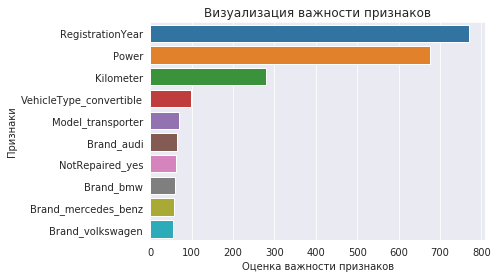

In [48]:
chart_feature_imp(model_lgbm)

Метрика RMSE у модели LGBMRegressor значительно ниже, чем у модели линейной регрессии, время обучения - выше, но скорость предсказания лучше.

### 2.2.3. CatBoostRegressor

In [49]:
for iteration in range(10, 101, 20):
    
    for depth in range(5, 11, 2):
    
        model_cbr = CatBoostRegressor(random_state=123, iterations=iteration, loss_function='RMSE', depth=depth)
    
        start = time.time() 
        model_cbr.fit(features_train, target_train)
        end_time_fit = time.time() - start

        start = time.time() 
        predictions_cbr = model_cbr.predict(features_valid, verbose=1)
        end_time_predict = time.time() - start

        RMSE = rmse(target_valid, predictions_cbr)
    
        results.append({'Модель': 'CatBoostRegressor', 
                        'Параметры': {'random_state':123, 
                                      'iterations': iteration, 
                                      'loss_function': 'RMSE', 
                                      'depth': depth}, 
                        'Время обучения': end_time_fit, 
                        'Скорость предсказания': end_time_predict, 
                        'RMSE': RMSE})

0:	learn: 4504.4895887	total: 74.1ms	remaining: 667ms
1:	learn: 4424.5951278	total: 173ms	remaining: 694ms
2:	learn: 4348.6732488	total: 276ms	remaining: 645ms
3:	learn: 4271.4965235	total: 383ms	remaining: 574ms
4:	learn: 4200.8745622	total: 568ms	remaining: 568ms
5:	learn: 4133.0450859	total: 672ms	remaining: 448ms
6:	learn: 4063.2231208	total: 775ms	remaining: 332ms
7:	learn: 3999.7557896	total: 879ms	remaining: 220ms
8:	learn: 3938.9174079	total: 1.06s	remaining: 118ms
9:	learn: 3875.3056247	total: 1.16s	remaining: 0us
0:	learn: 4495.8669357	total: 78.8ms	remaining: 709ms
1:	learn: 4408.1993368	total: 270ms	remaining: 1.08s
2:	learn: 4322.6248518	total: 379ms	remaining: 884ms
3:	learn: 4241.5314971	total: 572ms	remaining: 857ms
4:	learn: 4166.3335908	total: 679ms	remaining: 679ms
5:	learn: 4091.3369438	total: 871ms	remaining: 581ms
6:	learn: 4019.2845589	total: 978ms	remaining: 419ms
7:	learn: 3949.0980629	total: 1.17s	remaining: 292ms
8:	learn: 3881.6624968	total: 1.29s	remaining:

In [50]:
pd.DataFrame(results).style.highlight_min(color = 'lightgreen', axis = 0)

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE
0,LinearRegression,nan,18.8068,0.133426,3157.34
1,LGBMRegressor,"{'boosting_type': 'gbdt', 'max_depth': 11, 'n_estimators': 120, 'random_state': 123}",10.1608,1.19328,1785.42
2,CatBoostRegressor,"{'random_state': 123, 'iterations': 10, 'loss_function': 'RMSE', 'depth': 5}",7.25799,0.0276356,3870.9
3,CatBoostRegressor,"{'random_state': 123, 'iterations': 10, 'loss_function': 'RMSE', 'depth': 7}",7.08176,0.0105917,3811.9
4,CatBoostRegressor,"{'random_state': 123, 'iterations': 10, 'loss_function': 'RMSE', 'depth': 9}",8.02912,0.0121388,3774.61
5,CatBoostRegressor,"{'random_state': 123, 'iterations': 30, 'loss_function': 'RMSE', 'depth': 5}",9.56577,0.0111384,3034.72
6,CatBoostRegressor,"{'random_state': 123, 'iterations': 30, 'loss_function': 'RMSE', 'depth': 7}",10.2811,0.0113299,2916.09
7,CatBoostRegressor,"{'random_state': 123, 'iterations': 30, 'loss_function': 'RMSE', 'depth': 9}",11.7663,0.0131948,2836.81
8,CatBoostRegressor,"{'random_state': 123, 'iterations': 50, 'loss_function': 'RMSE', 'depth': 5}",12.4122,0.0121102,2632.97
9,CatBoostRegressor,"{'random_state': 123, 'iterations': 50, 'loss_function': 'RMSE', 'depth': 7}",13.4661,0.0122797,2495.09


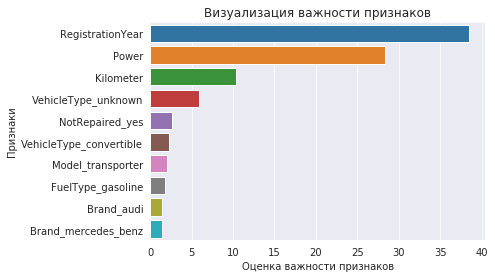

In [53]:
chart_feature_imp(model_cbr)

# 3. Анализ моделей и вывод

- наилучший результат *RMSE* показывает модель *LGBMRegressor*
- скорость предсказания лучше всего у модели *CatBoostRegressor* с гиперпараметрами *iterations* = 10 и *depth* = 7. Но показатель *RMSE* у этой модели очень высокий.
- время обучения лучше у модели *CatBoostRegressor* с гиперпараметрами *iterations* = 10 и *depth* = 9, но опять - качество предсказаний очень низкое. 

Так как заказчику важны все 3 параметра - качество предсказания, скорость предсказания и время обучения - можно посоветовать выбрать, например, модель *CatBoostRegressor* с гиперпараметрами *iterations* = 50 и *depth* = 7, где *RMSE* = 2495.09. На фоне остальных моделей, которые дают более менее приемлемое качество, эта обучается и предсказывает сравнительно быстро. 

Но, в идеальном случае, конечно, стоит попробовать заново подобрать гиперпараметры и повторить эксперимент. Но сейчас выдерем эту модель и проверим, как она отработает на тестовой выборке. 


In [51]:
model_final = CatBoostRegressor(random_state=123, iterations=50, loss_function='RMSE', depth=7)

start = time.time() 
model_final.fit(features_train, target_train)
end_time_fit = time.time() - start
print('End time (fit):', end_time_fit)

start = time.time() 
predictions_final = model_final.predict(features_test)
end_time_predict = time.time() - start
print('End time (predict):', end_time_predict)

print('RMSE final:', rmse(target_test, predictions_final))

0:	learn: 4495.8669357	total: 99.6ms	remaining: 4.88s
1:	learn: 4408.1993368	total: 290ms	remaining: 6.97s
2:	learn: 4322.6248518	total: 398ms	remaining: 6.24s
3:	learn: 4241.5314971	total: 589ms	remaining: 6.77s
4:	learn: 4166.3335908	total: 696ms	remaining: 6.26s
5:	learn: 4091.3369438	total: 888ms	remaining: 6.51s
6:	learn: 4019.2845589	total: 994ms	remaining: 6.11s
7:	learn: 3949.0980629	total: 1.19s	remaining: 6.23s
8:	learn: 3881.6624968	total: 1.31s	remaining: 5.95s
9:	learn: 3816.9259539	total: 1.49s	remaining: 5.95s
10:	learn: 3755.8928872	total: 1.68s	remaining: 5.97s
11:	learn: 3697.0688654	total: 1.79s	remaining: 5.68s
12:	learn: 3638.0315550	total: 1.99s	remaining: 5.66s
13:	learn: 3581.7492570	total: 2.18s	remaining: 5.61s
14:	learn: 3527.3442111	total: 2.29s	remaining: 5.35s
15:	learn: 3474.9976212	total: 2.48s	remaining: 5.27s
16:	learn: 3423.7026061	total: 2.59s	remaining: 5.04s
17:	learn: 3375.3128187	total: 2.78s	remaining: 4.95s
18:	learn: 3329.1132169	total: 2.98s	

И, в итоге, сравним работу модели с работой случайной модели.

In [52]:
dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(features_train, target_train)
predictions_r_dummy = dummy_regr.predict(features_test)
print('RMSE dummy:', rmse(target_test, predictions_r_dummy))

RMSE dummy: 4605.329171993719


Наша модель, несмотря на то, что ее качество оставляет желать лучшего, предсказывает гораздо лучше случайной модели.